In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [8]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [9]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

In [66]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
one_year_ago = dt.datetime.strptime(most_recent_date.date, '%Y-%m-%d') - dt.timedelta(days=366)
one_year_ago

datetime.datetime(2016, 8, 22, 0, 0)

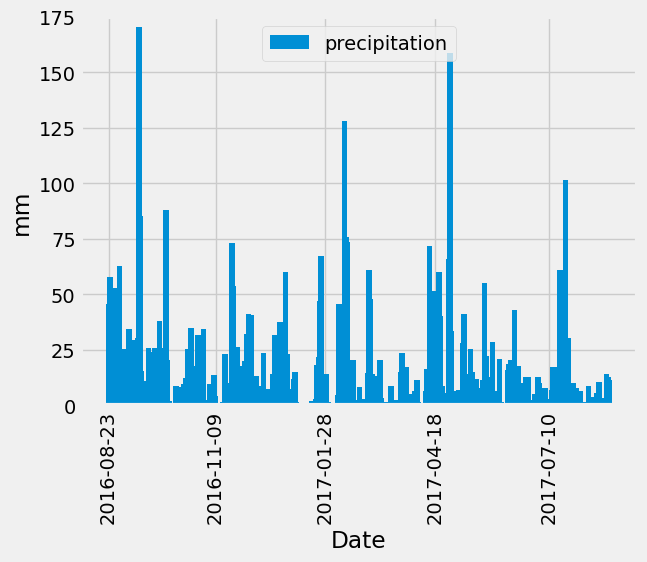

In [70]:

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).filter(Measurement.prcp.isnot(None)).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
results_df = pd.DataFrame(results, columns=['Date' , 'Precipitation'])

# Sort the dataframe by date
sorted_results_df = results_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(sorted_results_df['Date'], sorted_results_df['Precipitation'], label='precipitation', width=4)
plt.xlabel('Date')
dates = ['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10']
plt.legend(loc='upper center')
plt.ylabel('mm')
plt.ylim(0, 175)
plt.yticks(range(0, 176, 25))
plt.xticks(dates, rotation=90)
plt.show()

In [71]:
# Use Pandas to calculate the summary statistics for the precipitation data
pd.DataFrame(sorted_results_df['Precipitation'].describe())

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [72]:
# Design a query to calculate the total number of stations in the dataset
pd.DataFrame(sorted_results_df['Precipitation'].describe())

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


In [73]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [74]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(Measurement.station).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()

most_active_station_id = most_active_station[0]

lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station_id).first()
lowest_temp

highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station_id).first()
highest_temp

average_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station_id).first()
average_temp

print(f'{lowest_temp} {highest_temp} {average_temp}')

(12.2,) (29.4,) (22.03582251082252,)


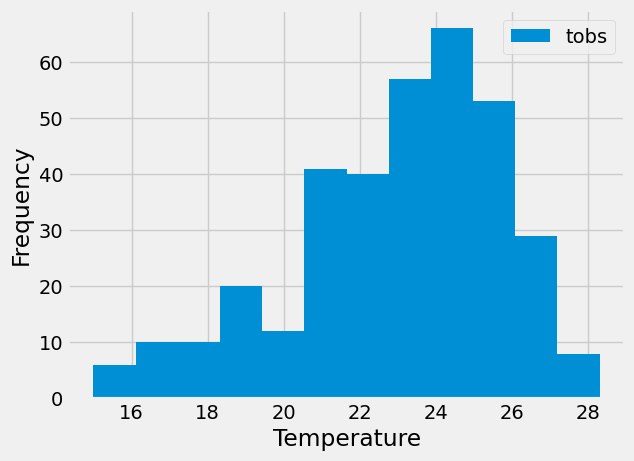

In [84]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_observation_data = session.query(Measurement.date, Measurement.tobs)\
    .filter(Measurement.date >= one_year_ago)\
        .filter(Measurement.station == most_active_station_id).all()

temperature_observation_data_df = pd.DataFrame(temperature_observation_data, columns=['Date', 'Temperature'])

plt.hist(temperature_observation_data_df['Temperature'], bins=12)
plt.legend(labels = ['tobs'], loc='upper right')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [16]:
# Close Session
session.close()
